<a href="https://colab.research.google.com/github/Louiseri1/MNIST/blob/main/Computer_Vision_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La base MNIST (Modified National Institute of Standards and Technology) est une base de données de chiffres écrits à la main développée pour le problème de reconnaissance de chiffres manuscrits par trois chercheurs : Yann LeCun, Corinna Cortes et Christopher Burges.

Elle regroupe 60 000 images, issues d'une base de données antérieure, appelée NIST. Ces images sont en échelle de gris, normalisées centrées et de taille 28x28 pixels. Les images sont données ici sous forme de vecteurs unidimensionnels de taille 784 (= 28 x 28 x 1). Nous sommes ici sur un seul canal représentant les échelles de gris.

In [4]:
# chargement des packages
import itertools
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# DL
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


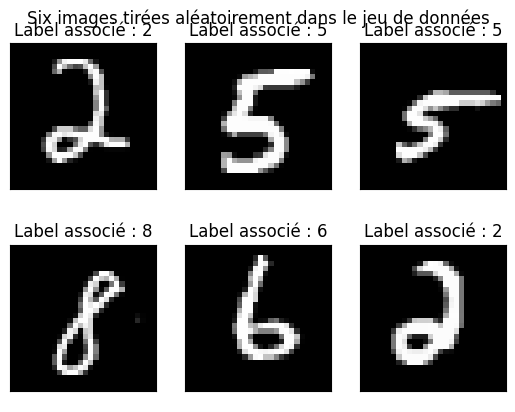

In [16]:
# 6 images tirées aléatoirement dans le jeu de données et labélisées
plt.title('Six images tirées aléatoirement dans le jeu de données')
plt.axis('off');
for i in range(1,7) :
    j = np.random.choice(range(len(y_train)))
    plt.subplot(2,3,i)
    plt.imshow(X_train[j], cmap = 'gray')
    plt.title(f'Label associé : {y_train[j]}')
    plt.xticks([])
    plt.yticks([]);

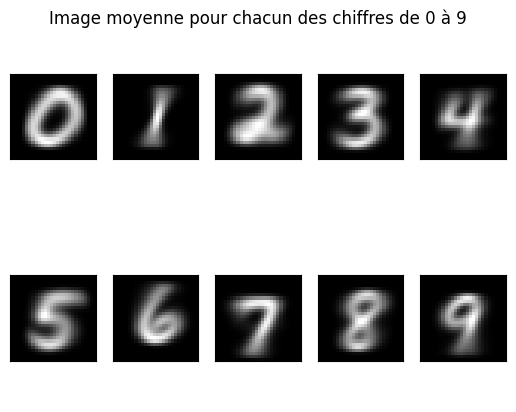

In [14]:
# Affichage de l'image 'moyenne' pour chacun des chiffres de 0 à 9
plt.title('Image moyenne pour chacun des chiffres de 0 à 9')
plt.axis('off');
for chiffre in range(10):
    t = X_train[y_train == chiffre]
    moyenne = t.mean(axis = 0)
    plt.subplot(2,5,chiffre+1)
    plt.imshow(moyenne, cmap = 'gray')
    plt.xticks([])
    plt.yticks([]);

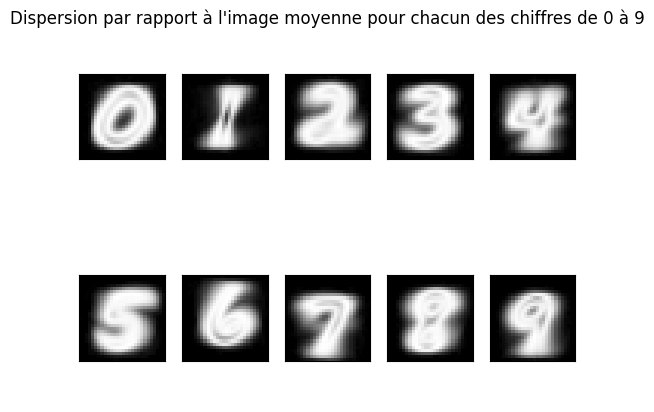

In [18]:
# Affichage de la variation de l'image ("écart type") pour chacun des chiffres de 0 à 9
plt.title("Dispersion par rapport à l'image moyenne pour chacun des chiffres de 0 à 9")
plt.axis('off');
for i in range(10) :
    t = X_train[y_train == i]
    variation = t.std(axis=0)
    plt.subplot(2, 5, i+1)
    plt.imshow(variation, cmap = 'gray')
    plt.xticks([])
    plt.yticks([]);

# Modélisations #
Random Forest pour la détection d'images

In [19]:
# Transformation de chaque X_train et X_test (initialement des vecteurs (28,28,1) en (1, 784))
# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)

# Modèle
rfc = RandomForestClassifier(n_jobs = -1) # on utilise tous les kernels pour les calculs
rfc.fit(X_train, y_train)

Shape of X: (60000, 784)
Shape of y: (60000,)


RandomForestClassifier(n_jobs=-1)

In [20]:
# Prédictions
test_pred = rfc.predict(X_test)

# Métriques d'évaluations
print(accuracy_score(y_test, test_pred)*100, "%")
print(classification_report(y_test, test_pred))
display(confusion_matrix(y_test, test_pred))

# Le f1 score qui fait la synthèse du recall et de la précision est très elevé pour chaque chiffres,
# ce qui signifie que les classes sont bien gérées par le modèle.
# L'accuracy est de 97 %
# On peut en conclure que déjà avec un modèle simple de Machine Learning, on obtient de bons résultats.

96.89999999999999 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



array([[ 968,    0,    1,    0,    0,    3,    4,    1,    3,    0],
       [   0, 1124,    2,    2,    1,    2,    3,    0,    1,    0],
       [   5,    1,  997,    6,    2,    0,    4,   10,    7,    0],
       [   1,    0,   10,  971,    0,    8,    0,    9,    8,    3],
       [   1,    0,    1,    0,  955,    0,    5,    0,    3,   17],
       [   2,    0,    0,   12,    3,  859,    6,    1,    6,    3],
       [   6,    3,    1,    0,    5,    5,  936,    0,    2,    0],
       [   1,    3,   21,    1,    1,    0,    0,  989,    2,   10],
       [   4,    0,    6,    5,    3,    8,    4,    5,  931,    8],
       [   4,    6,    1,   15,   11,    1,    1,    4,    6,  960]])

In [23]:
# Observations des erreurs récurrentes faites par le modèle
print("Le modèle distingue moins bien certains chiffres : ")
resultat = []
cnf = confusion_matrix(y_test, test_pred)
for i,j in itertools.product(range(cnf.shape[0]), range(cnf.shape[1])) : # itertools permet de parcourir les indices de la matrice
    if i != j and cnf[i,j] >= 15:                                        # On se place ailleurs que sur la diagonale où les predictions sont bonnes et là où les erreurs sont nombreuses (> 15)
        print(f"Le chiffre {i} est souvent confondu avec le chiffre {j}.")

Le modèle distingue moins bien certains chiffres : 
Le chiffre 4 est souvent confondu avec le chiffre 9.
Le chiffre 7 est souvent confondu avec le chiffre 2.
Le chiffre 9 est souvent confondu avec le chiffre 3.


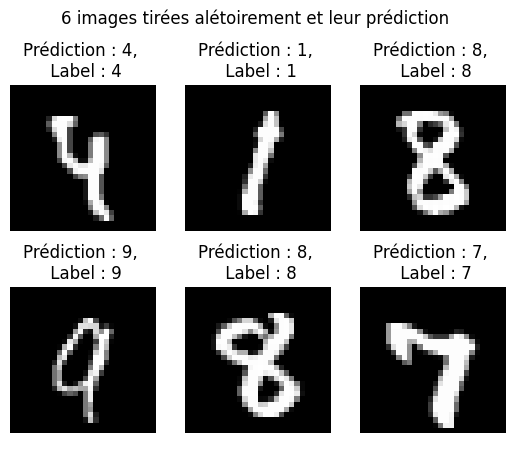

In [29]:
# Affichage de 6 images aléatoirement choisies dans le test set et leurs prédictions
plt.title('6 images tirées alétoirement et leur prédiction \n\n')
plt.axis('off');
for i in range(6) :
    plt.subplot(2,3,i+1)
    aleatoire = np.random.choice(range(len(y_test)))
    img = X_test[aleatoire]
    img = img.reshape(28, 28)
    plt.imshow(img, cmap = 'gray')
    plt.title(f"Prédiction : {test_pred[aleatoire]}, \n Label : {y_test[aleatoire]}")
    plt.axis('off');

Deep Learning - Dense Neural Network

In [30]:
# Pour des questions de performances, nous réduisons l'intensité pixels pour qu'ils soient compris entre 0 et 1
X_train = X_train / 255
X_test = X_test / 255

# On transforme également y_train et y_test pour qu'ils soient des vecteurs catégoriels binaires (codés 0 ou 1 pour chaque catégories / one hot)
# Cela est nécessaire pour l'utilisation d'une fonction de perte de classification multiclasses (categorical crossentropy)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
# Construction du modèle
model = Sequential()
model.add(Dense(20, input_shape = (784,), activation = 'tanh', kernel_initializer = 'normal')) # vecteur de poids est initialisés aléatoirement suivant la loi normale
                                                                                            # input_shape correspond à 28 * 28, le nombre de pixel par image
model.add(Dense(10, activation = 'softmax', kernel_initializer = 'normal')) # 10 neurones pour la sorties car on a 10 classes et softmax car c'est la fonction d'activation appropriée à une classification multiclasses
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6394 - loss: 1.6483 - val_accuracy: 0.8818 - val_loss: 0.5868
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8832 - loss: 0.5348 - val_accuracy: 0.9082 - val_loss: 0.3742
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.3660 - val_accuracy: 0.9184 - val_loss: 0.3100
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9178 - loss: 0.3089 - val_accuracy: 0.9267 - val_loss: 0.2752
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9242 - loss: 0.2752 - val_accuracy: 0.9313 - val_loss: 0.2536
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9326 - loss: 0.2475 - val_accuracy: 0.9336 - val_loss: 0.2391
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9335 - loss: 0.2383 - val_accuracy: 0.9361 - val_loss: 0.2306
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9379 - loss: 0.2216 - val_accuracy: 0.

[0.1776069849729538, 0.949400007724762]

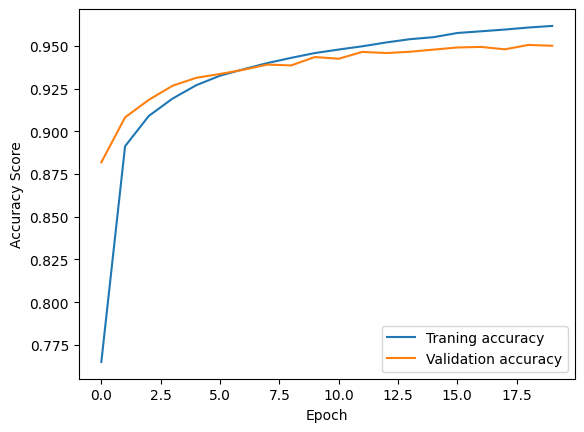

In [32]:
# Compilation
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, epochs = 20, batch_size = 200, validation_split = 0.2) # chaque epochs parcourera 60000/200 batchs

# Stocker les accuracies d'entraînement et de test obtenues à chaque epochs
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Visualisation de l'évolution au cours des epochs de nos scores d'accuracy
plt.plot(train_acc, label = 'Traning accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score');

model.evaluate(X_test, y_test)

In [33]:
# Prédictions du modèle
y_pred_proba = model.predict(X_test) # le modèle renvoit la probabilité d'appartenir à chaque classe
y_pred = np.argmax(y_pred_proba, axis = 1) # classes prédites
y_test = np.argmax(y_test, axis = 1) # classes réelles (on revient sans le one hot encoder)

# Métriques d'évaluation
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

# Nos score sont bons, mais légèrement moins bons qu'avec le modèle Random Forest

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.91      0.93       892
           6       0.95      0.97      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



array([[ 953,    0,    1,    2,    1,    4,   13,    1,    4,    1],
       [   0, 1121,    2,    2,    0,    0,    4,    2,    4,    0],
       [   6,    4,  971,   11,   11,    0,    5,   12,   11,    1],
       [   2,    1,   18,  952,    2,   12,    1,   12,    8,    2],
       [   0,    0,    6,    1,  940,    1,    7,    3,    2,   22],
       [   7,    3,    2,   27,    4,  811,   14,    3,   14,    7],
       [   7,    3,    6,    1,    4,    7,  929,    0,    1,    0],
       [   1,    7,   15,    8,    5,    0,    0,  975,    2,   15],
       [   6,    2,    3,   16,    7,   12,    7,    9,  907,    5],
       [   9,    7,    0,   10,   23,    6,    0,   14,    5,  935]])

Architecture LeNet - Réseau de neurones convolutifs

Cette architecture comprend des couches de convolutions, bien plus adaptées à l'extraction de caractéristiques (contrastes, bordures...) sur des images et donc particulièrement performantes en computer vision.

Nous reproduisons ici le modèle LeNet5, introduit par Yann LeCun en novembre 1995 dans le journal Proceedings of the IEEE. Il comporte deux couches de convolution (produit de convolution entre des matrices et un noyau extrayant certaines caractéristiques de l'image), deux couches de pooling (réduction de tuiles ie. parties de matrices à leur valeur maximale) et des couches de dropout (coupure d'une proportion de liens entre neurones pour éviter le surapprentissage).

In [34]:
# Transformations des images en tableau à quatre dimensions (nb images, largeur, hauteur et profondeur)
X_train_conv = X_train.reshape((-1, 28, 28, 1))
X_test_conv = X_test.reshape((-1, 28, 28, 1))

# Construction du modèle avec couches de convolution (prenant des matrices (28,28,1) en entrées)
model_conv = Sequential()
model_conv.add(Conv2D(filters=30, kernel_size=(5,5), padding='valid', input_shape=(28,28,1), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2,2)))
model_conv.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2,2)))
model_conv.add(Dropout(rate=0.2))
model_conv.add(Flatten())     # Obligation d'utiliser Flatten() ici car les couches dense ne prennent que des vecteurs en entrées (pas de matrices)
model_conv.add(Dense(units = 128, activation ='relu'))
model_conv.add(Dense(units = 10, activation ='softmax'))

# Compilation
model_conv.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Entraînement
training_history_conv = model_conv.fit(X_train_conv, y_train, epochs = 10, batch_size = 20, validation_split = 0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 60s 22ms/step - accuracy: 0.8793 - loss: 0.3895 - val_accuracy: 0.9839 - val_loss: 0.0572
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 90s 26ms/step - accuracy: 0.9778 - loss: 0.0709 - val_accuracy: 0.9873 - val_loss: 0.0458
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 87s 28ms/step - accuracy: 0.9839 - loss: 0.0534 - val_accuracy: 0.9886 - val_loss: 0.0400
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - accuracy: 0.9872 - loss: 0.0389 - val_accuracy: 0.9902 - val_loss: 0.0366
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 62s 26ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9879 - val_loss: 0.0390
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 74s 23ms/step - accuracy: 0.9909 - loss: 0.0272 - val_accuracy: 0.9912 - val_loss: 0.0292
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 89s 26ms/step - accuracy: 0.9916 - loss: 0.0265 - val_accuracy: 0.9907 - val_loss: 0.0320
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step - accuracy: 0.9918 -

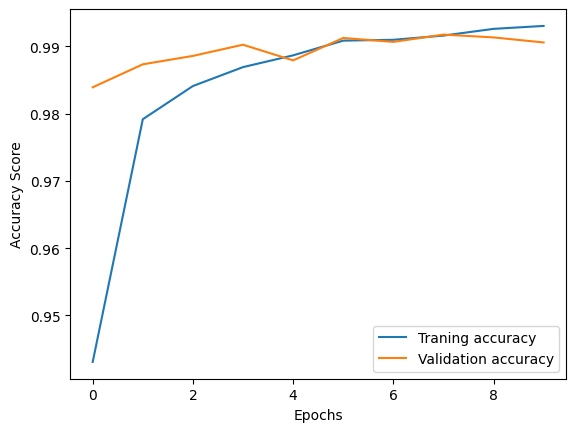

In [35]:
# Stocker les accuracies d'entraînement et de test obtenues à chaque epochs
train_acc = training_history_conv.history['accuracy']
val_acc = training_history_conv.history['val_accuracy']

# Visualisation de l'évolution au cours des epochs de nos scores d'accuracy
plt.plot(train_acc, label = 'Traning accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score');

# On observe déjà qu'au bout d'une epoch d'entraînement, notre modèle avec couches de convolution dépasse les modèles précédents (Random Forest et Dense Neural Network)

In [36]:
# Prédictions du modèle
y_pred_proba = model_conv.predict(X_test_conv) # le modèle renvoit la probabilité d'appartenir à chaque classe
y_pred = np.argmax(y_pred_proba, axis = 1) # classes prédites

# Métriques d'évaluation
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

# Le CNN surpasse de loin les autres modèles, avec des prédictions quasiment parfaites.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.97      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1126,    1,    5,    0,    0,    1,    2,    0,    0],
       [   0,    0, 1026,    1,    0,    0,    0,    2,    3,    0],
       [   0,    0,    1, 1007,    0,    0,    0,    0,    2,    0],
       [   1,    0,    0,    0,  966,    0,    1,    1,    0,   13],
       [   0,    0,    0,   12,    0,  876,    3,    0,    0,    1],
       [   4,    1,    0,    0,    1,    1,  950,    0,    1,    0],
       [   0,    3,    1,    3,    0,    0,    0, 1019,    0,    2],
       [   1,    0,    0,    1,    0,    0,    0,    0,  969,    3],
       [   0,    0,    0,    4,    1,    1,    0,    2,    0, 1001]])

In [37]:
# Les résultats obtenus avec l'architecture LeNet sont excellents.

# Synthèse de la modélisation #

Étude des perfomances de nos modèles de Deep Learning et observation des erreurs de classification que le modèle LeNet peut faire.

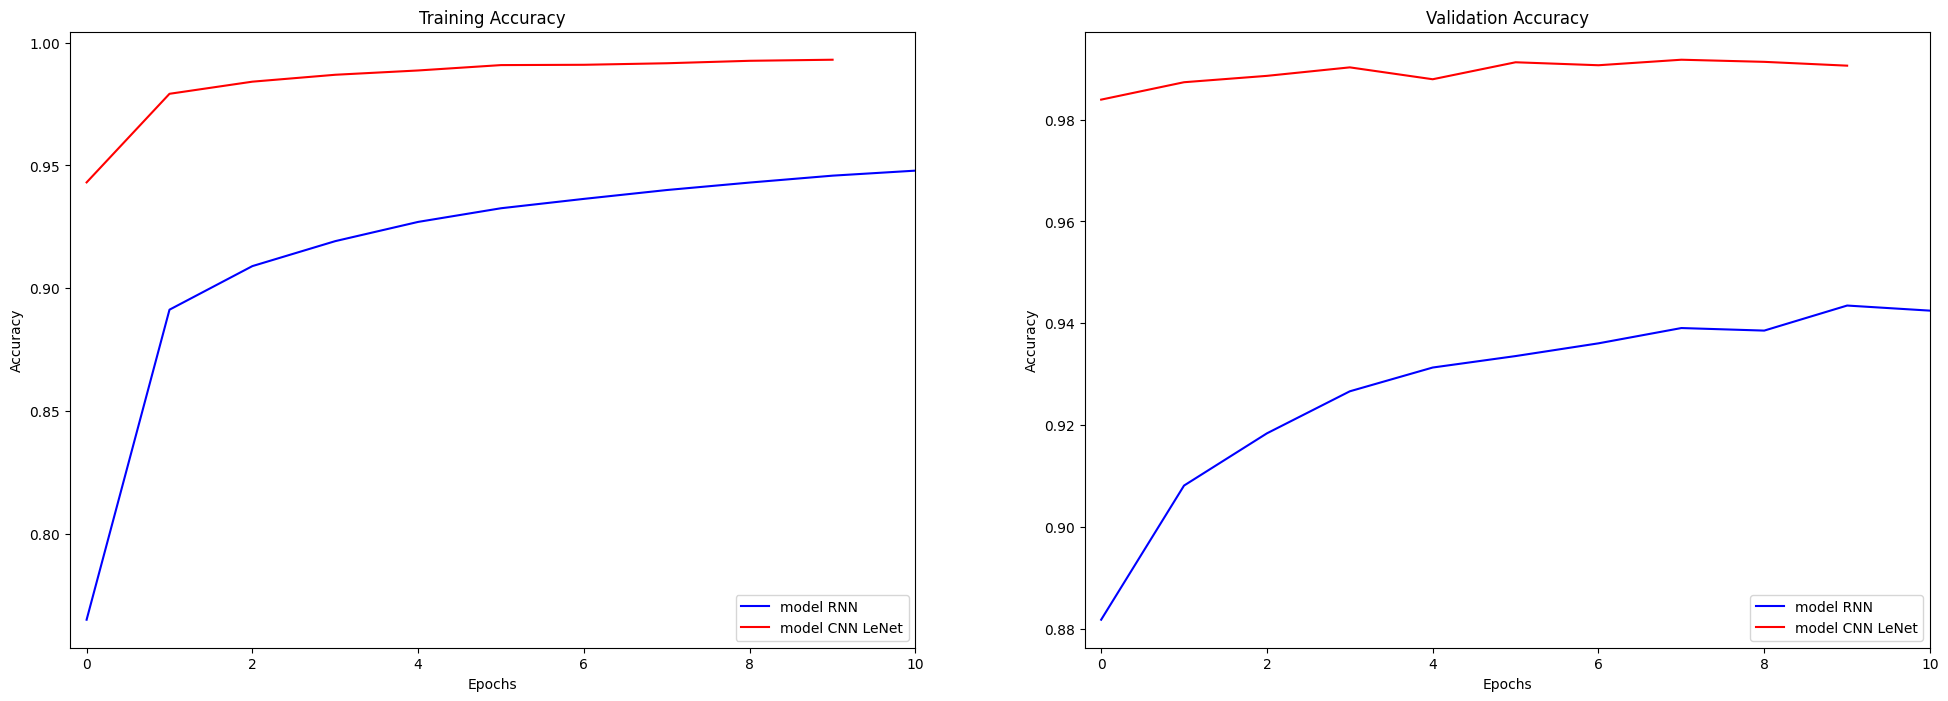

In [38]:
# Synthèse des résultats des modèles de Deep Learning - Visualisation des accuracies sur les 10 premières epochs

plt.figure(figsize=(24,8))

plt.subplot(121)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label = 'model RNN', color='blue')
plt.plot(training_history_conv.history['accuracy'], label = 'model CNN LeNet', color='red')
plt.xlim(-0.2,10)
plt.legend()

plt.subplot(122)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['val_accuracy'], label = 'model RNN', color='blue')
plt.plot(training_history_conv.history['val_accuracy'], label = 'model CNN LeNet', color='red')

plt.xlim(-0.2,10)
plt.legend();

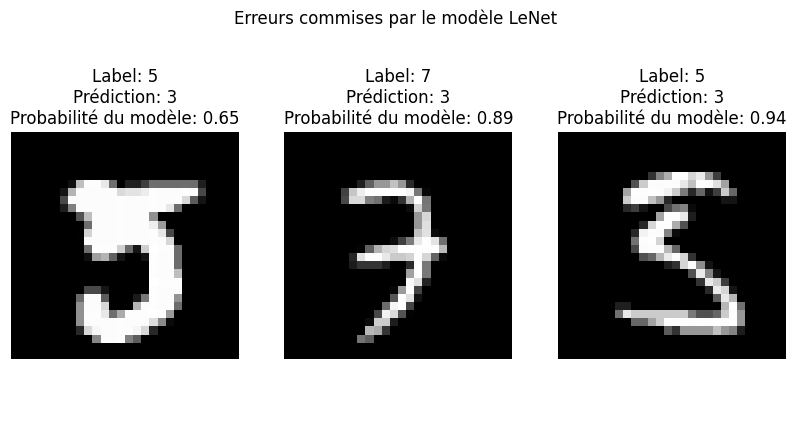

In [56]:
# Observation de trois erreurs commises (choix aléatoire) par le modèle LeNet

# Index des erreurs
error_indexes = []
for i in range(len(y_pred)):
    if (y_pred[i] != y_test[i]):
        error_indexes += [i]

# Visualisation
plt.figure(figsize = (10,5))
plt.title('Erreurs commises par le modèle LeNet \n')
plt.axis('off');
j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i]
    img = img.reshape(28, 28)

    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='None')
    plt.title('Label: ' + str(y_test[i]) \
              + '\n' + 'Prédiction: '+ str(y_pred[i]) \
              + '\n' + 'Probabilité du modèle: '+ str(round(y_pred_proba[i][y_pred[i]], 2)))

# On voit bien que ces erreurs auraient pu être commises par un humain :
# Elles dépendent plus de l'écriture (ou le scan) en elle-même que de la bonne performance du modèle.